In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

*****

**Global Temperature**

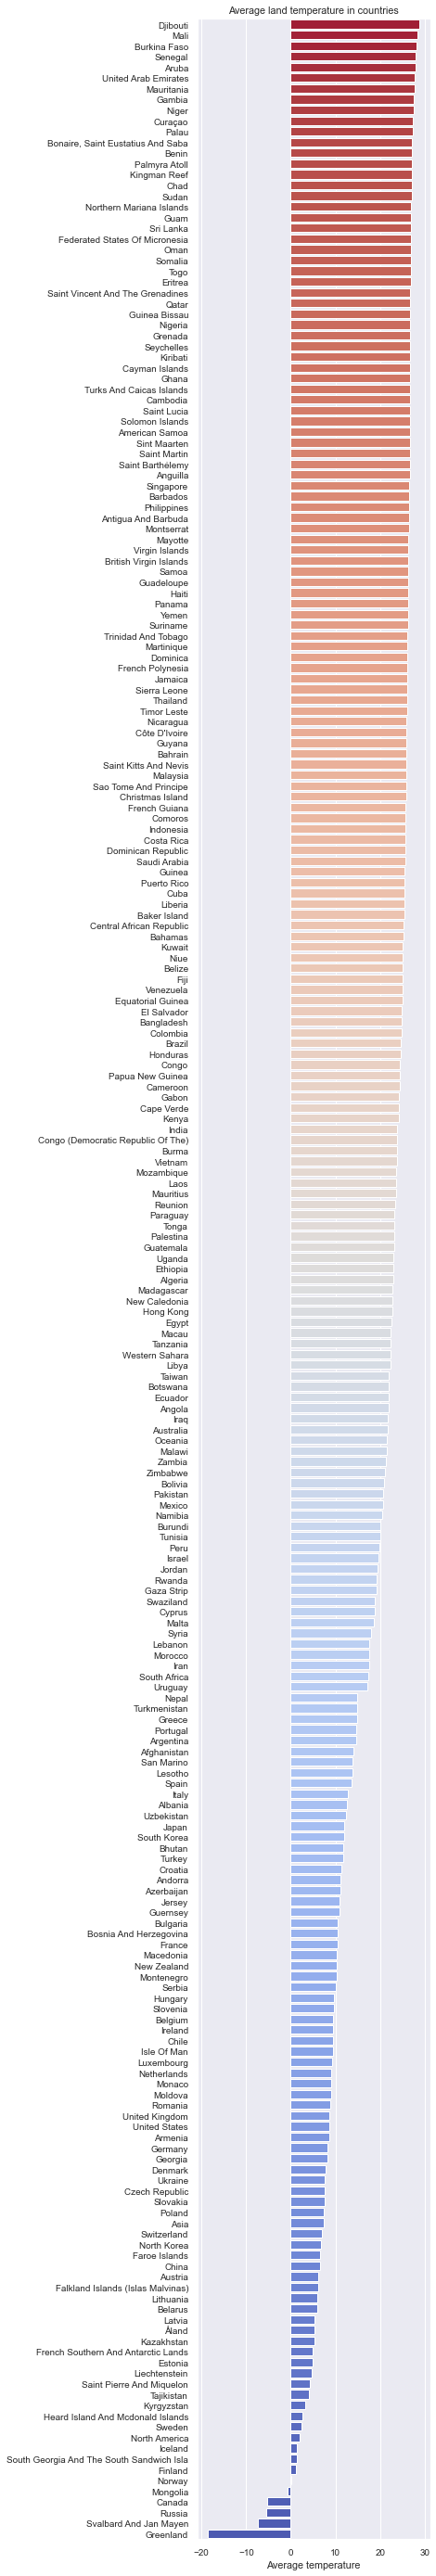

In [142]:
global_temp_country = pd.read_csv('archive/GlobalLandTemperaturesByCountry.csv')
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])


countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == country]['AverageTemperature'].mean())
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries),reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

Text(0.5, 0, 'year')

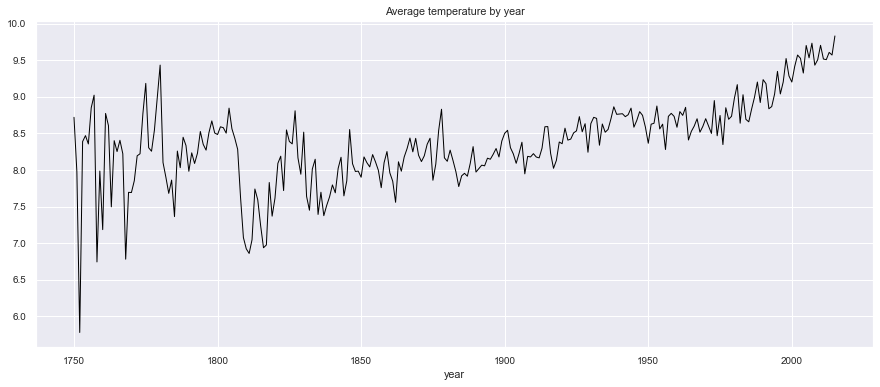

In [54]:
plt.figure(figsize=(15,6))
global_temp = pd.read_csv('archive/GlobalTemperatures.csv', parse_dates=['dt'])
mean_temp_year = globaltemp.groupby(globaltemp.dt.dt.year).mean()
mean_temp_year.LandAverageTemperature.plot(linewidth=1, color='black')
plt.title('Average temperature by year')
plt.xlabel('year')

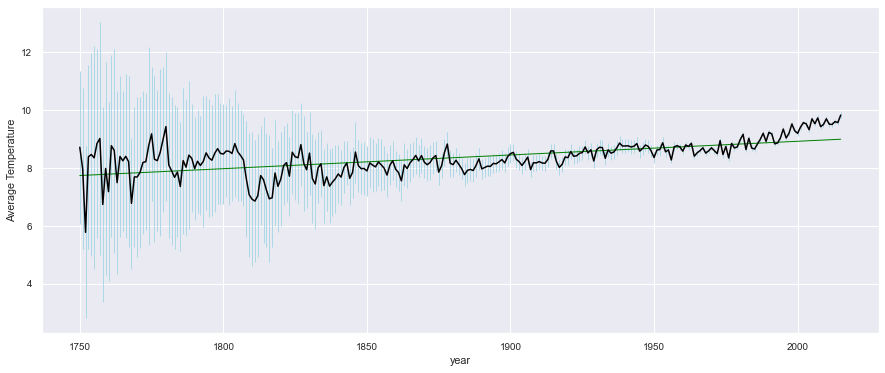

In [71]:
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

reg = linear_model.Ridge(alpha=1)
reg.fit(x_train, y_train)
prediction = reg.predict(x_train)

plt.figure(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('Average Temperature')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, yerr=mean_temp_year.LandAverageTemperatureUncertainty, color='black', ecolor='lightblue', elinewidth=1)
plt.plot(x_train, prediction, color='green', linewidth='1')
plt.show()

In [56]:
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

reg = linear_model.Ridge(alpha=0)
reg.fit(x_train, y_train)
prediction = reg.predict(x_train)

reg2 = linear_model.Ridge(alpha=50000)
reg2.fit(x_train, y_train)
prediction2 = reg2.predict(x_train)

reg3 = linear_model.Ridge(alpha=500000)
reg3.fit(x_train, y_train)
prediction3 = reg3.predict(x_train)

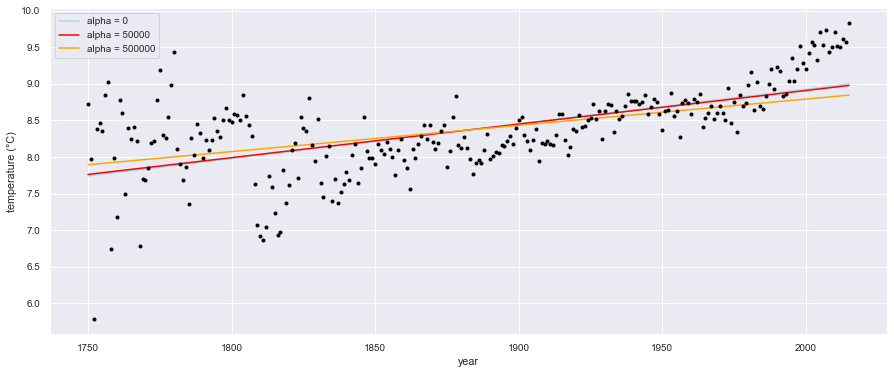

In [141]:
plt.figure(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, prediction, color='lightblue')
p2 = plt.plot(x_train, prediction2, color='red')
p3 = plt.plot(x_train, prediction3, color='orange')

plt.legend(['alpha = 0','alpha = 50000','alpha = 500000'], numpoints=1)
plt.show()

In [112]:
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

alphas = [0, 1, 50]
predictions = []
for i in range(0, 3):
    model = make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=alphas[i]))
    model.fit(x_train, y_train)
    predictions.append(model.predict(x_train))

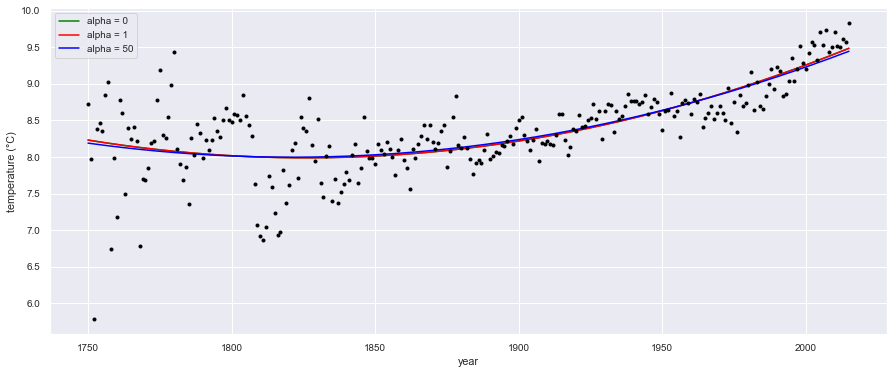

In [117]:
plt.figure(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, predictions[0], color='green')
p1 = plt.plot(x_train, predictions[1], color='red')
p2 = plt.plot(x_train, predictions[2], color='blue')

plt.legend(['alpha = 0','alpha = 1','alpha = 50'], numpoints=1)
plt.show()

In [140]:
from sklearn import model_selection

temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

degrees = [1, 2]
predictions = []



for i in range(0, 2):
    model = make_pipeline(PolynomialFeatures(degrees[i]), linear_model.Ridge(alpha=1))
    model.fit(x_train, y_train)
    predictions.append(model.predict(x_train))

kfold = model_selection.KFold(n_splits=10, random_state=10)
score_model = make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1))
results = model_selection.cross_val_score(score_model, x_train, y_train, cv=kfold, scoring='r2')
print("score: ",results.mean())

score:  -0.6678420538684354


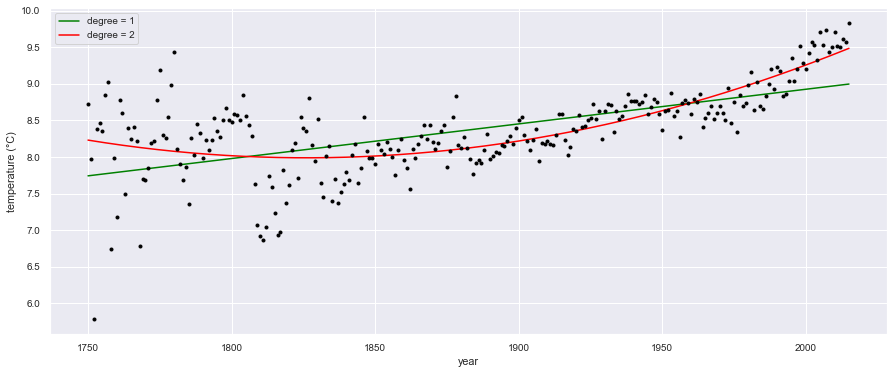

In [138]:
plt.figure(figsize=(15,6))
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, predictions[0], color='green')
p1 = plt.plot(x_train, predictions[1], color='red')


plt.legend(['degree = 1','degree = 2'], numpoints=1)
plt.show()

**Belo Horizonte**

In [111]:
cities = pd.read_csv('archive/GlobalLandTemperaturesByMajorCity.csv')
Be = cities.loc[cities['City'] == 'Belo Horizonte', ['dt','AverageTemperature']]
Be.columns = ['Date','Temperature of Belo Horizonte']
Be['Date'] = pd.to_datetime(Be['Date'])
Be.reset_index(drop=True, inplace=True)
Be.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
Be = Be.loc['1900':'2013']
Be = Be.asfreq('M', method='bfill')
Be.head(-15)

,Temperature of Belo Horizonte
Date,
1900-01-31,22.688
1900-02-28,23.286
1900-03-31,20.606
1900-04-30,19.557
1900-05-31,17.795
...,...
2012-01-31,23.842
2012-02-29,23.299
2012-03-31,22.683


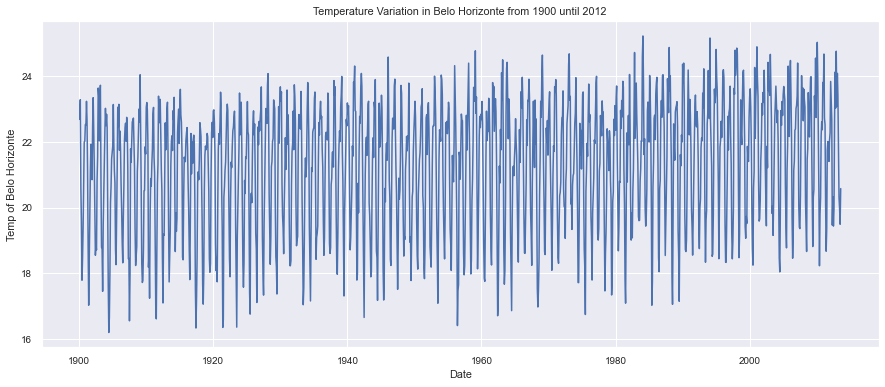

In [106]:
plt.figure(figsize=(15,6))
sns.lineplot(x=Be.index, y=Be['Temp of Belo Horizonte'])
plt.title('Temperature Variation in Belo Horizonte from 1900 until 2012')
plt.show()

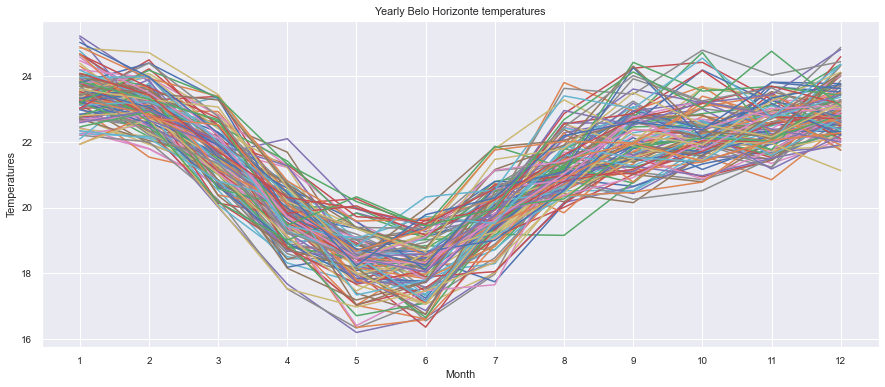

In [107]:
Be['month'] = Be.index.month
Be['year'] = Be.index.year
pivot1 = pd.pivot_table(Be, values='Temp of Belo Horizonte', index='month', columns='year', aggfunc='mean')
pivot1.plot(figsize=(15,6))
plt.title('Yearly Belo Horizonte temperatures')
plt.xlabel('Month')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

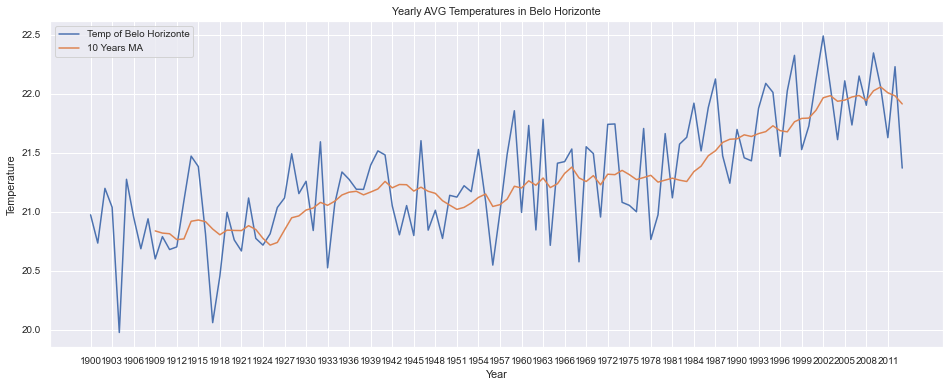

In [109]:
year_avg1 = pd.pivot_table(Be, values='Temp of Belo Horizonte', index='year', aggfunc='mean')
year_avg1['10 Years MA'] = year_avg1['Temp of Belo Horizonte'].rolling(10).mean()
year_avg1[['Temp of Belo Horizonte','10 Years MA']].plot(figsize=(16,6))
plt.title('Yearly AVG Temperatures in Belo Horizonte')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

**Chengdu analysis**

In [95]:
cities = pd.read_csv('archive/GlobalLandTemperaturesByMajorCity.csv')
Cd = cities.loc[cities['City'] == 'Chengdu', ['dt','AverageTemperature']]
Cd.columns = ['Date','Temperature of Chengdu']
Cd['Date'] = pd.to_datetime(Cd['Date'])
Cd.reset_index(drop=True, inplace=True)
Cd.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
Cd = Cd.loc['1900':'2013-01-01']
Cd = Cd.asfreq('M', method='bfill')
Cd.head(-7)

,Temperature of Chengdu
Date,
1900-01-31,1.013
1900-02-28,5.828
1900-03-31,11.266
1900-04-30,14.656
1900-05-31,17.170
...,...
2012-01-31,2.743
2012-02-29,7.367
2012-03-31,12.470


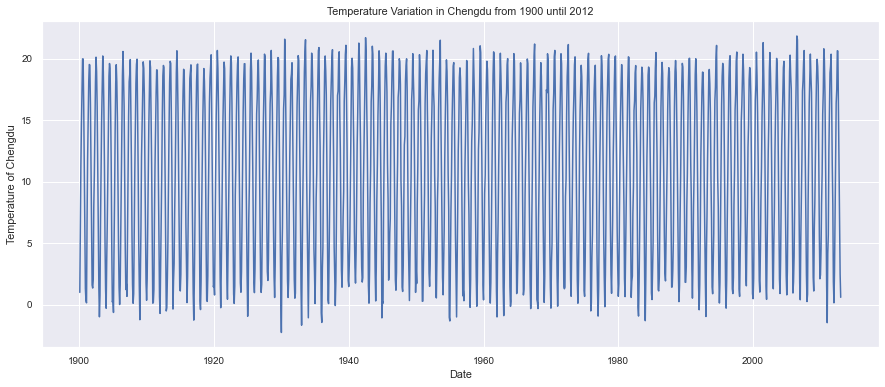

In [11]:
plt.figure(figsize=(15,6))
sns.lineplot(x=Cd.index, y=Cd['Temperature of Chengdu'])
plt.title('Temperature Variation in Chengdu from 1900 until 2012')
plt.show()

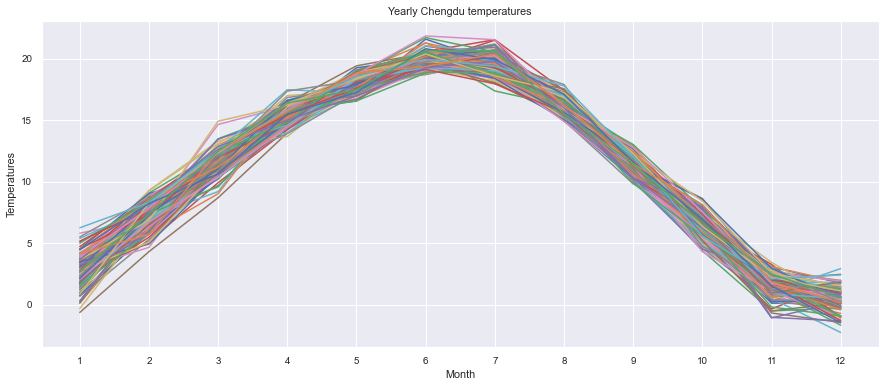

In [12]:
Cd['month'] = Cd.index.month
Cd['year'] = Cd.index.year
pivot2 = pd.pivot_table(Cd, values='Temperature of Chengdu', index='month', columns='year', aggfunc='mean')
pivot2.plot(figsize=(15,6))
plt.title('Yearly Chengdu temperatures')
plt.xlabel('Month')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

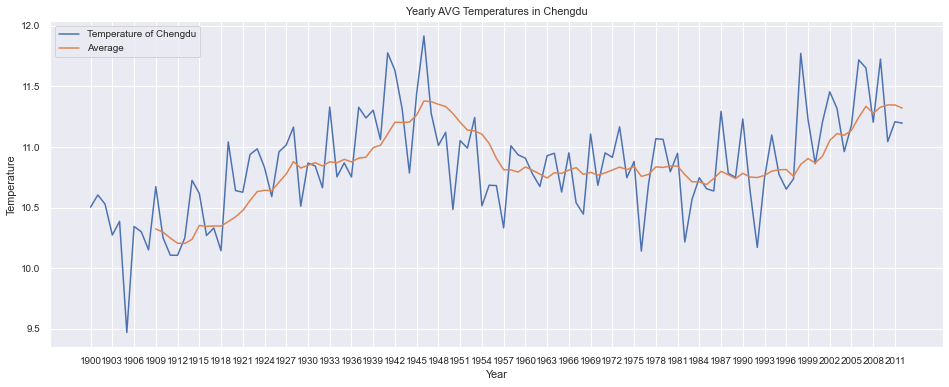

In [13]:
year_avg2 = pd.pivot_table(Cd, values='Temperature of Chengdu', index='year', aggfunc='mean')
year_avg2['Average'] = year_avg2['Temperature of Chengdu'].rolling(10).mean()
year_avg2[['Temperature of Chengdu','Average']].plot(figsize=(16,6))
plt.title('Yearly AVG Temperatures in Chengdu')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

**Chicago analysis**

In [96]:
cities = pd.read_csv('archive/GlobalLandTemperaturesByMajorCity.csv')
Chi = cities.loc[cities['City'] == 'Chicago', ['dt','AverageTemperature']]
Chi.columns = ['Date','Temperature of Chicago']
Chi['Date'] = pd.to_datetime(Chi['Date'])
Chi.reset_index(drop=True, inplace=True)
Chi.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
Chi = Chi.loc['1900':'2013-01-01']
Chi = Chi.asfreq('M', method='bfill')
Chi.head(-7)

,Temperature of Chicago
Date,
1900-01-31,-3.409
1900-02-28,-0.282
1900-03-31,8.347
1900-04-30,13.055
1900-05-31,16.976
...,...
2012-01-31,3.698
2012-02-29,12.145
2012-03-31,8.383


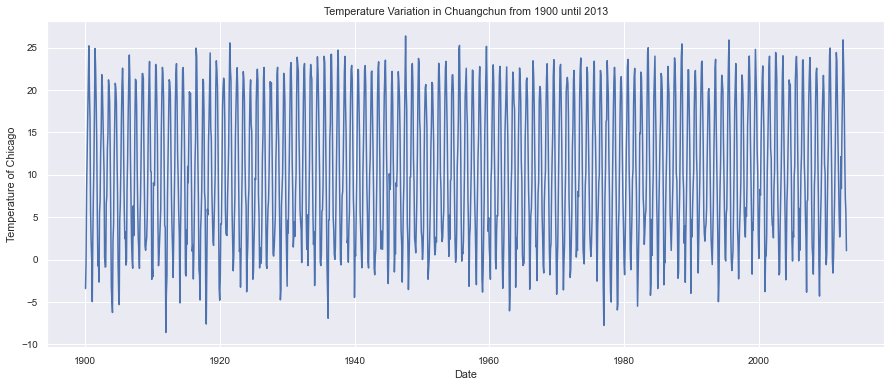

In [15]:
plt.figure(figsize=(15,6))
sns.lineplot(x=Chi.index, y=Chi['Temperature of Chicago'])
plt.title('Temperature Variation in Chuangchun from 1900 until 2013')
plt.show()

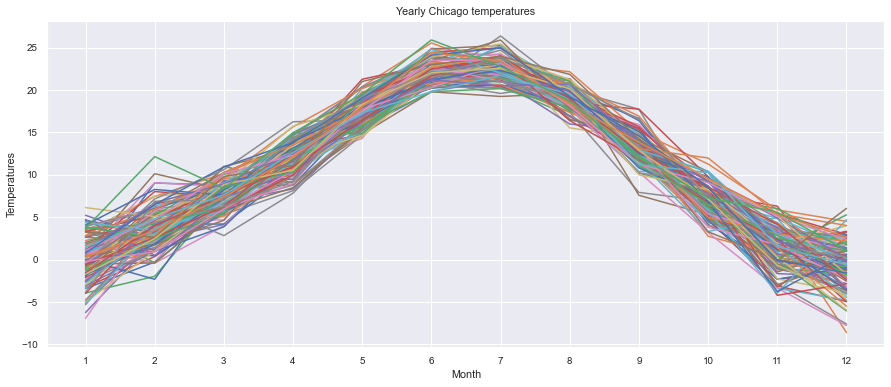

In [16]:
Chi['month'] = Chi.index.month
Chi['year'] = Chi.index.year
pivot = pd.pivot_table(Chi, values='Temperature of Chicago', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(15,6))
plt.title('Yearly Chicago temperatures')
plt.xlabel('Month')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

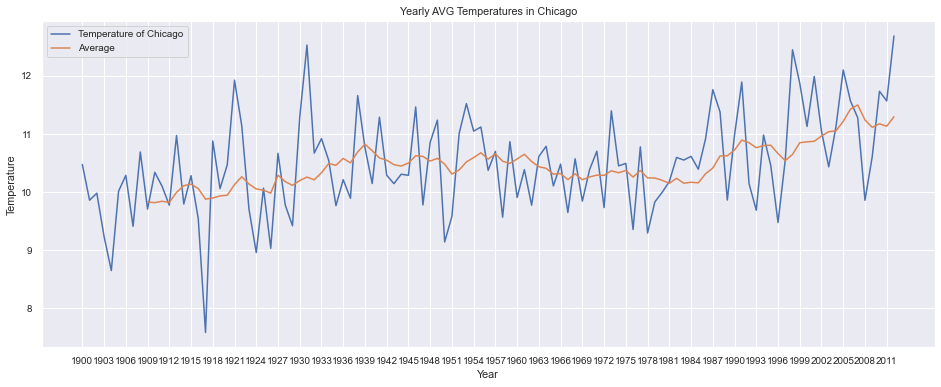

In [17]:
year_avg3 = pd.pivot_table(Chi, values='Temperature of Chicago', index='year', aggfunc='mean')
year_avg3['Average'] = year_avg3['Temperature of Chicago'].rolling(10).mean()
year_avg3[['Temperature of Chicago','Average']].plot(figsize=(16,6))
plt.title('Yearly AVG Temperatures in Chicago')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

****************